# Airbnb Data Analysis

**_Airbnb_** is a San Francisco based platform that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities accessible via the website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking.

The purpose of this project is to analyse and get some meaningful insight into Airbnb's February 2021 listing in London and the dataset is from Inside Airbnb [website](http://insideairbnb.com/get-the-data.html). 

### Load Data

In [144]:
# import relevant library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

In [145]:
# load dataset
data = pd.read_csv('listings.csv')
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.16,2,365
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.66,1,189
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,42,2019-11-02,0.35,15,270


In [146]:
# confirming size of the dataset
data.shape

(76534, 16)

The dataset contains over 76 thousand listings and 16 features. 

In [147]:
# check for data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76534 entries, 0 to 76533
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              76534 non-null  int64  
 1   name                            76510 non-null  object 
 2   host_id                         76534 non-null  int64  
 3   host_name                       76488 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   76534 non-null  object 
 6   latitude                        76534 non-null  float64
 7   longitude                       76534 non-null  float64
 8   room_type                       76534 non-null  object 
 9   price                           76534 non-null  int64  
 10  minimum_nights                  76534 non-null  int64  
 11  number_of_reviews               76534 non-null  int64  
 12  last_review                     

From our observation, **neighbourhood group** has 76533 missing values and some other attributes as well, but we shall be dropping some columns that wouldn't be relevant for this analysis

### Data Cleaning

In [148]:
# adding price per night
data['price_per_nights'] = data['price'] / data['minimum_nights']

In [149]:
# select only relevant features
new_data = ['host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'price_per_nights', 'minimum_nights', 'number_of_reviews', 'availability_365']
data = data[new_data] # saving as dataframe
data.head(3)

,host_name,neighbourhood,latitude,longitude,room_type,price,price_per_nights,minimum_nights,number_of_reviews,availability_365
0,Alina,Islington,51.56802,-0.11121,Private room,40,40.00,1,21,365
1,Philippa,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,7.50,10,89,189
2,Liz,Westminster,51.52195,-0.14094,Entire home/apt,307,76.75,4,42,270


In [150]:
# inspecting for missing values
data.isnull().sum()

host_name            46
neighbourhood         0
latitude              0
longitude             0
room_type             0
price                 0
price_per_nights      0
minimum_nights        0
number_of_reviews     0
availability_365      0
dtype: int64

In [151]:
# fill in missing values for host name column with "unknown"
data.host_name.fillna('Unknown', inplace=True)

### Exploratory Analysis

In [152]:
# statisticalsummary
data.describe()

,latitude,longitude,price,price_per_nights,minimum_nights,number_of_reviews,availability_365
count,76534.000000,76534.000000,76534.000000,76534.000000,76534.000000,76534.000000,76534.000000
mean,51.510066,-0.128113,113.899051,61.314550,5.308582,15.207437,118.742154
std,0.047620,0.094883,313.830681,288.716697,23.053843,35.431784,143.842762
min,51.297330,-0.510220,0.000000,0.000000,1.000000,0.000000,0.000000
25%,51.484460,-0.188307,42.000000,18.000000,1.000000,0.000000,0.000000
50%,51.514250,-0.125730,75.000000,35.000000,2.000000,3.000000,42.000000
75%,51.539520,-0.069172,120.000000,60.000000,4.000000,14.000000,252.000000
max,51.679980,0.288570,17746.000000,17746.000000,1125.000000,821.000000,365.000000


The above summary gives an idea of the average listing price, average minimum number of nights, average numbers of reviews and average availability of listing in a year. If we would look closely at the price data, we notice it is skewed towards cheaper homes, with a relatively long tail at high prices.

In [153]:
# summary of categorical variables
data.describe(include=['O'])

,host_name,neighbourhood,room_type
count,76534,76534,76534
unique,14245,33,4
top,Veeve,Westminster,Entire home/apt
freq,1155,8507,41633


 The above categorical summary shows that **_Veeve_** is the host with the highest number of listings and **_Westminster_** seems like a hotspot for guests with **_Entire home/Apt_** type of room.

#### Type of Room

In [154]:
# how many different Room Types exist in the listing
data.room_type.nunique()

4

There are four different **Room Types** that exist in Airbnb listing in London

#### % of Listing by Room Type

In [155]:
# percentage of all listing by room type
data.room_type.value_counts(normalize=True)

Entire home/apt    0.543980
Private room       0.440771
Shared room        0.007944
Hotel room         0.007304
Name: room_type, dtype: float64

**Entire home/apt** accounts for 54% of the total room type closely followed by **Private room** which is about 45%. From indications, it seems a lot of people fancy **Entire home/apt** and **Private room** compared to another room type.

#### What is the Average Price per Room Type

In [156]:
# what's the average price per room type.
data[['room_type','price', 'price_per_nights', 'minimum_nights']].groupby('room_type')\
  .agg(['mean','count'])\
    .sort_values(by=('price','mean'), ascending=False).round(2)

price        price_per_nights        minimum_nights       
                   mean  count             mean  count           mean  count
room_type                                                                   
Entire home/apt  157.26  41633            76.68  41633           5.68  41633
Hotel room       119.88    559            82.23    559           2.06    559
Shared room       62.59    608            49.53    608           4.21    608
Private room      61.21  33734            42.21  33734           4.92  33734

Now, the average price for an **Entire home/apt** is GBP 157 closely followed by **Hotel room** which is about GBP 120 for a minimum of 5 nights @76.68 Pounds per nights and 2 nights @82.23 per night respectively which I think in my opinion is expensive, but anyway is it London.

#### Who are the Hosts with the highest average number of reviews

In [170]:
# host with highest number of reviews.
data[['host_name', 'price_per_nights', 'number_of_reviews', 'minimum_nights', 'availability_365']].groupby('host_name')\
  .agg(['mean','count'])\
    .sort_values(by=('number_of_reviews','mean'), ascending=False).round(2).head(5)

price_per_nights       number_of_reviews        \
                               mean count              mean count   
host_name                                                           
Agri & Roger                  36.00     1             528.0     1   
Litsa                         77.50     2             514.0     2   
Dave And Karen                16.50     1             438.0     1   
Yasmin And Freddie            23.33     3             432.0     3   
Victor & Rachel               20.00     1             429.0     1   

                   minimum_nights       availability_365        
                             mean count             mean count  
host_name                                                       
Agri & Roger                  2.0     1           365.00     1  
Litsa                         1.0     2           225.00     2  
Dave And Karen                2.0     1             0.00     1  
Yasmin And Freddie            1.0     3           175.67     3  
Victor & Rachel               1.0     1           317.00     1

Interestingly, **Agri & Roger** has the highest number of reviews, charges GBP 36 per nights and available 365 days on average.

#### Which host charges the hightest price per night on the average?

In [176]:
# host with highest price per night.
data[['host_name', 'price_per_nights', 'minimum_nights']].groupby('host_name')\
  .agg(['mean','count'])\
    .sort_values(by=('price_per_nights','mean'), ascending=False).round(2).head(5)

price_per_nights       minimum_nights      
                        mean count           mean count
host_name                                              
Yuting               7000.00     2            1.0     2
Romero               6250.00     1            1.0     1
City Living          6117.89    45            1.0    45
Jimit                4000.00     1            1.0     1
Remy                 3958.25     2            1.5     2

On average **Yuting** charges GBP 7000 per night... it must be a luxury apartment for such an amount.

### Data Visualization

#### What's the Listing Price by Neighbourhood 

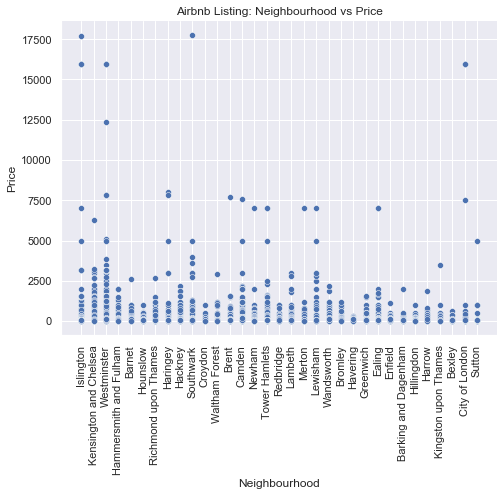

In [158]:
# compare neighbourhood and prices 
sns.relplot(x='neighbourhood', y='price', data=data,  
            kind='scatter', aspect=1.4)
plt.title('Airbnb Listing: Neighbourhood vs Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=90);

There are more listing under 500 GBP in Westminster a district in central London and it's a very attractive neighbourhood. According to [Wikipedia]('https://en.wikipedia.org/wiki/Westminster') Westminster often refers to the Parliament of the United Kingdom, located in the UNESCO World Heritage Palace of Westminster — also known as the Houses of Parliament. The area is the centre of Her Majesty's Government, with Parliament in the Palace of Westminster and most of the major Government ministries known as Whitehall. Hence, the reason why its prices are high.

#### What are the Top 10 Airbnb Neighbourhood

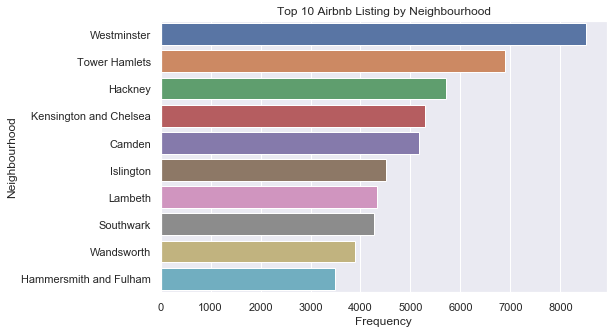

In [159]:
# top 5 airbnb listing by neighbourhood
plt.figure(figsize = (8, 5))
sns.countplot(y= data['neighbourhood'],
                  order=data['neighbourhood'].value_counts().index[:10])
plt.title('Top 10 Airbnb Listing by Neighbourhood')
plt.xlabel('Frequency')
plt.ylabel('Neighbourhood')
plt.show()

Overall, these are the top 10 listed districts in London by popular demand.

#### Who are the Top 10 Airbnb Host

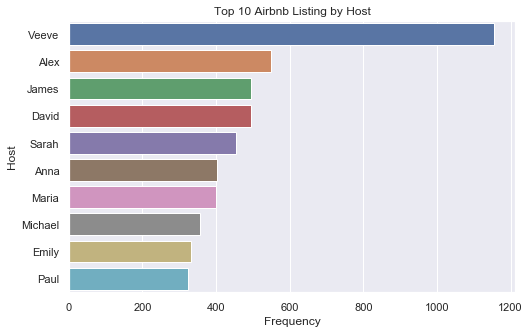

In [160]:
# top 10 airbnb listing by host name
plt.figure(figsize = (8, 5))
sns.countplot(y= data.host_name,
                  order=data.host_name.value_counts().index[:10])
plt.title('Top 10 Airbnb Listing by Host')
plt.xlabel('Frequency')
plt.ylabel('Host')
plt.show()

**Veeve** seems to have more listings is counts for 1.5% of the entire Airbnn London listing for the month of Feb. 

#### What's the minimum number of nights 

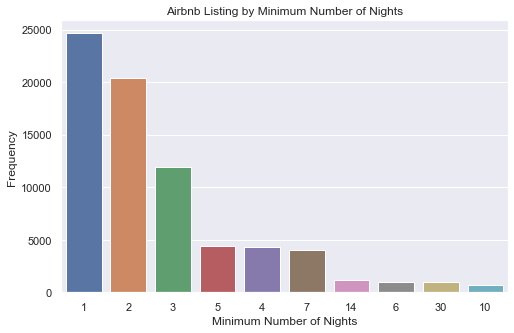

In [162]:
# airbnb listing by minimum number of nights
plt.figure(figsize = (8, 5))
sns.countplot(x = data.minimum_nights,
                  order=data.minimum_nights.value_counts().index[:10])
plt.title('Airbnb Listing by Minimum Number of Nights')
plt.xlabel('Minimum Number of Nights')
plt.ylabel('Frequency')
plt.show()

Now we can see clearly that Minimum Number of 1 Night is the most listed, this could probably be driven by market demand and the fact most people were just passing a night.

#### Relative locations of Room Type in London

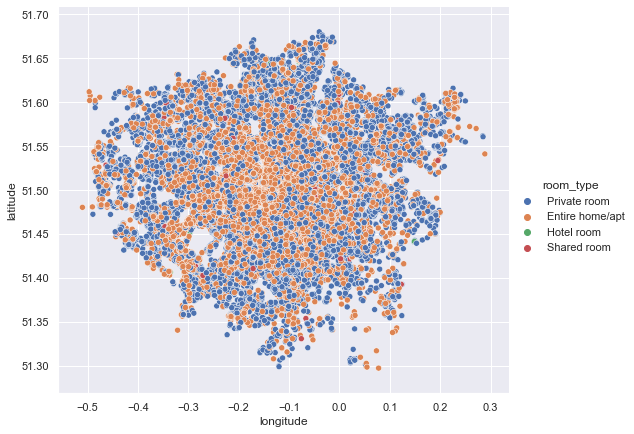

In [163]:
# listings based on the location provided by latitude and longitude values
sns.relplot(x='longitude', y='latitude', data=data,   
            kind='scatter', hue='room_type',
            height=6, aspect=1.2);

Apparently, there are far more **Entire home/apt** than **Private rooms** listing in London this could probably be as a result of a group of friends or families on tourist or business visit. 


### Inferences and Conclusion

It's clear that most Airbnb guest tends to spend a minimum of one night especially in most London districts considered as hotspots such as Westminster, Tower Hamlets, Hackney et al. Based on [Wired's]('https://www.wired.co.uk/article/airbnb-coronavirus-london') blog article of Friday 27 March 2020, he was quoted saying "Many of these listings are concentrated in and around London’s tourist hotspots, where a deluge of furnished apartments have been made available for rent in recent days, many for well below the market rate." Now we can see why districts like Westminster flooded with listings.

Lastly, hosts having Hotel and Shared rooms should find try to introduce incentives in order to attract more guests and make their lodging more private because it seems like most guests prefer spaces the provides more privacy.




### References

* [Wikipedia](https://en.wikipedia.org/wiki/Airbnb)
* [Wired](https://www.wired.co.uk/article/airbnb-coronavirus-london)
* [BetterProgramming](https://betterprogramming.pub/airbnb-data-analysis-with-pandas-and-seaborn-11ceebba1eab)